# Laborator 6 - Theodor Moroianu - 334

In [1]:
# importam modulele
from dictlearn import DictionaryLearning, methods
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
import matplotlib.pyplot as plt
import numpy as np
import numpy

In [2]:
# constantele date in lab
p = 8
s = 6
N = 1000
n = 256
K = 100
sigma = 0.075

### Exercitiul 1

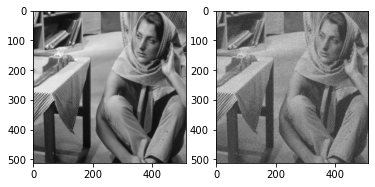

In [3]:
# 1.A 
# citim imaginea
I = plt.imread("barbara.png")

# 1.B
# adaugam un zgomot gausian
Inoisy = I + sigma * np.random.randn(*I.shape)

# plotuim cele doua imagini
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(I, cmap="gray")
ax[1].imshow(Inoisy, cmap="gray")
plt.show()

In [5]:
# 1.C
# extragem patchuri, si le dam reshape la o matrice 2d
Ynoisy = extract_patches_2d(Inoisy, patch_size=(p, p))
Ynoisy = Ynoisy.reshape(Ynoisy.shape[0], -1)

# scadem pe fiecare linie media (deci media pe axis=1)
Ynoisy_mean = np.mean(Ynoisy, axis=1).reshape((-1, 1))
Ynoisy -= Ynoisy_mean

# transpunem matricea, a.i. sa fie de 64 x -1
Ynoisy = np.transpose(Ynoisy)
print(f"Ynoisy.shape = {Ynoisy.shape}")

# 1.D
# extragem N patchuri random pe coloane, pastrand toate
# liniile din matrice
Y = Ynoisy[:, numpy.random.choice(Ynoisy.shape[1],N)]
print(f"Y.shape = {Y.shape}")

Ynoisy.shape = (64, 255025)
Y.shape = (64, 1000)


### Exercitiu 2

In [7]:
# 2.A
# generam un dictionar random
D0 = np.random.randn(64, n)
# normalizam dictionarul
D0 = normalize(D0, axis=0, norm='max')
print(f"D0.shape = {D0.shape}")

D0.shape = (64, 256)


In [8]:
# 2.B
# antrenam dictionarul
dl = DictionaryLearning(
    n_components=n,
    max_iter=K,
    fit_algorithm='ksvd',
    n_nonzero_coefs=s,
    code_init=None,
    dict_init=D0,
    params=None,
    data_sklearn_compat=False
)
dl.fit(Y)
D = dl.D_

print(f"D.shape = {D.shape}")

D.shape = (64, 256)


### Exercitiu 3

In [9]:
# 3.A
# calculam reprezentarea rara a semnalului in raport cu D
Xc, err = methods.omp(Ynoisy, D, n_nonzero_coefs=s)

In [10]:
# 3.B
# bazandu-ne pe reprezentarea rara Xc, calculam valoarea
# obtinuta a patchurilor
Yc = D.dot(Xc)
# adaugam inapoi media fiecarui patch, scazuta mai sus
Yc += Ynoisy_mean.reshape((1, -1))

print(f"Yc.shape = {Yc.shape}")

Yc.shape = (64, 255025)


In [11]:
# 3.C
# Calculam matricea Ic, obtinuta din patchurile calculate mai sus
Ic = reconstruct_from_patches_2d(Yc.transpose().reshape(-1, 8, 8), Inoisy.shape)

### Exercitiu 4

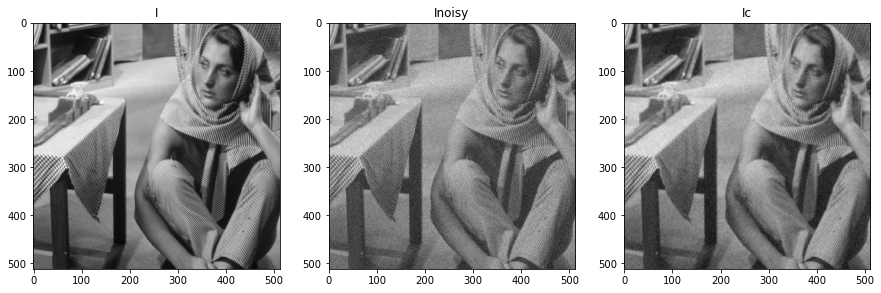

In [12]:
# 4.A
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].set_title("I")
ax[0].imshow(I, cmap="gray")
ax[1].set_title("Inoisy")
ax[1].imshow(Inoisy, cmap="gray")
ax[2].set_title("Ic")
ax[2].imshow(Ic, cmap="gray")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

In [17]:
# 4.B
# functia care calculeaza eficienta
def psnr(img1, img2):
    mse = numpy.mean((img1 - img2) ** 2)
    if(mse == 0):
        return 0
    max_pixel = 255
    psnr = 20 * numpy.log10(max_pixel / numpy.sqrt(mse))
    return psnr

print(f"psnr(I, Inoisy) = {psnr(I, Inoisy):.4f}")
print(f"psnr(I, Ic)     = {psnr(I, Ic):.4f}")

psnr(I, Inoisy) = 70.6319
psnr(I, Ic)     = 75.0896
